# Bussines Problem

## 1. Context

Industri telekomunikasi saat ini berada dalam kondisi persaingan yang sangat ketat. Banyaknya pilihan membuat pelanggan dapat dengan mudah berpindah ke kompetitor apabila merasa tidak puas terhadap layanan, harga, atau kualitas.

Salah satu tantangan terbesar yang dihadapi perusahaan telekomunikasi adalah tingginya customer churn, yaitu kondisi ketika pelanggan memutuskan untuk berhenti menggunakan layanan dan beralih ke kompetitor. Churn yang tinggi secara langsung berdampak pada:

* Penurunan pendapatan berulang (recurring revenue)
* Peningkatan biaya akuisisi pelanggan baru
* Penurunan loyalitas pelanggan terhadap brand

Perusahaan telah memiliki data historis pelanggan dan ingin memanfaatkan data tersebut untuk memprediksi pelanggan yang berpotensi churn lebih awal, sehingga dapat dilakukan tindakan preventif sebelum pelanggan benar-benar berhenti berlangganan.

Seorang Data Scientist diminta untuk membangun model machine learning yang mampu memprediksi kemungkinan pelanggan akan churn atau tidak, serta mengidentifikasi faktor-faktor utama penyebab churn.

---

## 2. Target Variable

**Variabel Target: Churn**

* `1` (Positive/Yes): Pelanggan akan berhenti berlangganan / churn
* `0` (Negative/No): Pelanggan tetap menggunakan layanan Telco

---

## 3. Problem Statement

Tingginya persentase customer churn merupakan salah satu indikator kegagalan perusahaan telekomunikasi dalam mempertahankan pelanggan. Hal ini menjadi masalah serius karena biaya untuk mendapatkan pelanggan baru (Customer Acquisition Cost / CAC) jauh lebih besar dibandingkan biaya mempertahankan pelanggan lama (Customer Retention Cost).

Berdasarkan berbagai sumber industri:

* Biaya mendapatkan pelanggan baru bisa mencapai 5 kali lebih mahal dibandingkan mempertahankan pelanggan lama
* kehilangan satu pelanggan diasumsikan memiliki dampak finansial yang signifikan dibandingkan biaya pemberian insentif retensi, sehingga mencegah churn menjadi prioritas bisnis.

Saat ini, perusahaan telah menjalankan program retensi seperti:

* Diskon harga
* Paket layanan khusus
* Prioritas layanan pelanggan

Namun, program retensi tersebut belum efektif, karena:

* Insentif diberikan secara merata ke seluruh pelanggan
* Banyak pelanggan yang sebenarnya loyal tetap menerima promo
* Biaya promosi menjadi tinggi dengan ROI yang rendah

Tanpa kemampuan prediksi yang baik, perusahaan berisiko:

* Memberikan insentif kepada pelanggan yang tidak berisiko churn
* Kehilangan pelanggan bernilai tinggi yang seharusnya bisa dipertahankan

---

## 4. Goals (Business & Analytical Goals)

### 🎯 Business Goals

1. Mengurangi tingkat customer churn
2. Mengoptimalkan biaya retensi pelanggan
3. Meningkatkan efektivitas strategi pemasaran dan customer retention

### 🎯 Analytical Goals

1. Membangun model klasifikasi churn untuk memprediksi kemungkinan pelanggan akan churn
2. Mengidentifikasi faktor/variabel yang paling berpengaruh terhadap churn melalui feature importance
3. Memberikan insight yang dapat digunakan oleh tim bisnis untuk:
   * Menentukan pelanggan prioritas retensi
   * Menyesuaikan strategi layanan dan produk

---

## 5. Analytic Approach

Pendekatan analitik yang dilakukan adalah sebagai berikut:

### 1. Exploratory Data Analysis (EDA)

* Mengidentifikasi pola jumlah keseimbangan pelanggan churn dan non-churn

### 2. Feature Engineering & Feature Selection

* Encoding data kategorikal dan ordinal
* Scaling data numerikal
* Seleksi fitur untuk meningkatkan performa model

### 3. Modeling

* Membangun model klasifikasi machine learning untuk memprediksi churn
* Melakukan cross-validation dan hyperparameter tuning

### 4. Model Evaluation

* Evaluasi performa model berdasarkan metric yang relevan dengan dampak bisnis

---

## 6. Metric Evaluation

Dalam permasalahan customer churn, tidak semua jenis kesalahan prediksi memiliki dampak bisnis yang sama. Oleh karena itu, pemilihan metrik evaluasi harus mempertimbangkan konsekuensi finansial dari masing-masing jenis kesalahan.

### Type of Errors & Business Impact

#### 🔴 Type 1 Error – False Positive
*(Pelanggan sebenarnya tidak churn, tetapi diprediksi churn)*

**Dampak Bisnis:**
* Pemberian insentif retensi yang tidak diperlukan
* Biaya promosi menjadi tidak efisien


#### 🔴 Type 2 Error – False Negative
*(Pelanggan sebenarnya churn, tetapi diprediksi tidak churn)*

**Dampak Bisnis:**
* Kehilangan pelanggan secara permanen
* Kehilangan pendapatan jangka panjang (Customer Lifetime Value)

---

### Primary Evaluation Metric: Recall

Berdasarkan perbandingan dampak bisnis di atas, **False Negative** memiliki konsekuensi yang jauh lebih besar dibandingkan **False Positive**. Oleh karena itu, fokus utama model adalah:

> **Memaksimalkan kemampuan model dalam mengidentifikasi pelanggan yang benar-benar akan churn.**

#### 🎯 Alasan Memilih Recall

* Recall mengukur proporsi pelanggan churn yang berhasil terdeteksi oleh model
* Recall tinggi berarti:
  * Lebih sedikit pelanggan churn yang terlewat
  * Strategi retensi dapat dilakukan lebih awal
* Sangat sesuai untuk use case churn prevention

#### 🎯 Definisi Recall (Churn = Positive Class)

$$\text{Recall} = \frac{TP}{TP + FN}$$

* **TP** (True Positive): Pelanggan churn yang berhasil terdeteksi
* **FN** (False Negative): Pelanggan churn yang gagal terdeteksi

# Data Understanding

Sumber data : https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp

In [441]:
import pandas as pd
import numpy as np

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc

# Associaton Nominal
from dython.nominal import associations

# Train-Test split and CrossVal
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder


# Scaling
from sklearn.preprocessing import MinMaxScaler

# Transfrom & One-Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

#Feature Selection
from scipy.stats import chi2_contingency, f_oneway

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier 

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, precision_recall_curve, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, auc, average_precision_score

#Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [442]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## Data Description

Berikut adalah penjelasan untuk setiap kolom dalam dataset:

* **Dependents**: Menunjukkan apakah pelanggan memiliki tanggungan (anggota keluarga yang bergantung) atau tidak.

* **Tenure**: Jumlah bulan pelanggan telah berlangganan atau menggunakan layanan perusahaan.

* **OnlineSecurity**: Menunjukkan apakah pelanggan berlangganan layanan keamanan online atau tidak.

* **OnlineBackup**: Menunjukkan apakah pelanggan berlangganan layanan backup/cadangan data online atau tidak.

* **InternetService**: Menunjukkan apakah pelanggan berlangganan layanan Internet atau tidak.

* **DeviceProtection**: Menunjukkan apakah pelanggan berlangganan layanan perlindungan perangkat atau tidak.

* **TechSupport**: Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis atau tidak.

* **Contract**: Jenis kontrak berdasarkan durasi waktu berlangganan (misalnya: bulanan, tahunan, atau dua tahunan).

* **PaperlessBilling**: Menunjukkan apakah tagihan dikeluarkan dalam bentuk tanpa kertas (paperless/digital) atau tidak.

* **MonthlyCharges**: Jumlah biaya layanan yang dikenakan kepada pelanggan setiap bulan.

* **Churn**: Menunjukkan apakah pelanggan berhenti berlangganan (churn) atau tetap menggunakan layanan.

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dataset ini terdiri dari ``4.930 ``data pelanggan tanpa nilai kosong, dengan komposisi fitur yang didominasi oleh variabel kategorikal (``9 kolom bertipe object``) dan hanya ``dua variabel numerik, yaitu tenure (lama berlangganan) dan MonthlyCharges`` (biaya bulanan).

In [444]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


### Insight Bisnis dari Setiap Fitur

#### 1. **Dependents** (2 nilai unik)
- Variabel kategorikal sederhana dengan 2 pilihan: Yes/No
- **Insight Bisnis**: Pelanggan dengan tanggungan cenderung lebih stabil karena memiliki komitmen keluarga yang lebih tinggi. Perusahaan dapat membuat paket keluarga untuk meningkatkan retensi.

#### 2. **Tenure** (73 nilai unik)
- Rentang dari 0-72 bulan, menunjukkan distribusi pelanggan dari yang baru bergabung hingga pelanggan setia jangka panjang
- **Insight Bisnis**: Tenure adalah indikator loyalitas pelanggan. Pelanggan dengan tenure rendah (0-12 bulan) berisiko tinggi churn dan memerlukan perhatian khusus untuk program retensi.

#### 3. **OnlineSecurity** (3 nilai unik)
- Nilai: Yes, No, No internet service
- **Insight Bisnis**: Pelanggan tanpa layanan keamanan online mungkin lebih rentan churn. Ini bisa menjadi peluang upselling untuk meningkatkan value dan loyalitas.

#### 4. **OnlineBackup** (3 nilai unik)
- Nilai: Yes, No, No internet service
- **Insight Bisnis**: Layanan tambahan seperti backup online dapat meningkatkan switching cost, membuat pelanggan lebih sulit berpindah ke kompetitor.

#### 5. **InternetService** (3 nilai unik)
- Nilai: DSL, Fiber optic, No
- **Insight Bisnis**: Jenis layanan internet mempengaruhi harga dan kepuasan pelanggan. Fiber optic biasanya lebih mahal namun memberikan kualitas lebih baik. Pelanggan "No internet" hanya menggunakan layanan telepon.

#### 6. **DeviceProtection** (3 nilai unik)
- Nilai: Yes, No internet service, No
- **Insight Bisnis**: Layanan proteksi perangkat meningkatkan customer engagement dan menciptakan barrier to exit yang lebih tinggi.

#### 7. **TechSupport** (3 nilai unik)
- Nilai: Yes, No, No internet service
- **Insight Bisnis**: Dukungan teknis dapat meningkatkan kepuasan pelanggan dan mengurangi frustasi yang menjadi pemicu churn.

#### 8. **Contract** (3 nilai unik)
- Nilai: Month-to-month, One year, Two year
- **Insight Bisnis**: Jenis kontrak sangat krusial. Pelanggan Month-to-month memiliki fleksibilitas tinggi untuk churn, sementara kontrak tahunan memberikan komitmen lebih stabil.

#### 9. **PaperlessBilling** (2 nilai unik)
- Nilai: Yes, No
- **Insight Bisnis**: Preferensi billing digital vs tradisional. Pelanggan paperless mungkin lebih tech-savvy dan memiliki perilaku berbeda dalam penggunaan layanan.

#### 10. **MonthlyCharges** (1422 nilai unik)
- Rentang harga yang sangat beragam (dari ~$19 hingga >$118)
- **Insight Bisnis**: Variasi harga yang tinggi menunjukkan diversifikasi paket layanan. Pelanggan dengan biaya bulanan tinggi tanpa layanan premium yang sepadan mungkin merasa overcharged dan berisiko churn.

#### 11. **Churn** (2 nilai unik)
- Nilai: Yes, No
- **Target Variable**: Variabel yang ingin diprediksi. Merepresentasikan apakah pelanggan churn atau tidak.

In [445]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


In [446]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak terdapat missing value

In [447]:
df.duplicated().sum()

np.int64(77)

Terdapat 77 duplicated data yang perlu kita handle kedepannya.

# EDA

## Univariate Analysis

Churn
No     3614
Yes    1316
Name: count, dtype: int64

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


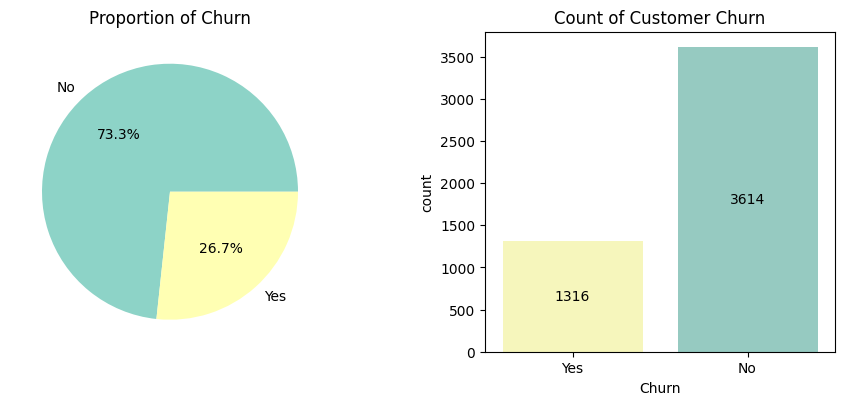

In [448]:
# Churn imbalance
print(df['Churn'].value_counts())
print()
print(df['Churn'].value_counts()/len(df['Churn'])*100)

# Color mapping
palette = sns.color_palette('Set3')

color_mapping = {'No': palette[0], 'Yes': palette[1]}


plt.figure(figsize=(14, 4))
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# Pie Chart
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', colors=[color_mapping[label] for label in df['Churn'].value_counts().index])
plt.title('Proportion of Churn')

# Bar Chart
plt.subplot(1,2,2)
bar_plot = sns.countplot(data=df, x='Churn', palette=color_mapping)
plt.title('Count of Customer Churn')
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='center')

plt.show()

Distribusi target menunjukkan bahwa sekitar ``26,7%`` pelanggan mengalami churn, sementara ``73,3%`` pelanggan tetap bertahan, yang mengindikasikan adanya ``ketidakseimbangan kelas``

In [449]:

num_cols = ['tenure', 'MonthlyCharges']
outlier_results = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_results[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Jumlah Outlier": len(outliers),
        "Index Outlier": outliers.index.tolist()
    }

# Menampilkan  hasil outlier
for col, result in outlier_results.items():
    print(f"\n=== OUTLIER CHECK: {col} ===")
    print(f"Lower Bound: {result['Lower Bound']}")
    print(f"Upper Bound: {result['Upper Bound']}")
    print(f"Jumlah Outlier: {result['Jumlah Outlier']}")



=== OUTLIER CHECK: tenure ===
Lower Bound: -60.0
Upper Bound: 124.0
Jumlah Outlier: 0

=== OUTLIER CHECK: MonthlyCharges ===
Lower Bound: -42.14999999999999
Upper Bound: 169.04999999999998
Jumlah Outlier: 0


# Data Preparation

### Handling Duplicated data

Agar tidak ada pola berulang dalam data dan untuk menjaga kualitas data maka data duplicated perlu dibersihkan(dihapus)

In [450]:
#membersihkan duplicates 
df=df.drop_duplicates()

### Feature Engineering

In [451]:
# mengubah 'No internet service' menjadi 'No' pada dataframe
df = df.replace('No internet service','No')

Mengubah ``No internet service`` menjadi ``No`` mengurangi kardinalitas fitur dari 3 kategori menjadi 2 kategori (binary), sehingga menyederhanakan proses encoding dan membantu model menghindari overfitting dengan menghilangkan redundansi kategori yang memiliki arti sama (tidak menggunakan layanan).

In [452]:
# Daftar kolom layanan internet
num_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Membuat kolom baru dengan menghitung jumlah 'Yes' pada keempat kolom tersebut
df['TotalServices'] = (df[num_services] == 'Yes').sum(axis=1)

# Menampilkan hasil
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TotalServices']].head(10)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TotalServices
0,No,No,Yes,Yes,2
1,No,Yes,Yes,No,2
2,Yes,No,Yes,Yes,3
3,Yes,Yes,Yes,Yes,4
4,No,No,No,No,0
5,No,No,Yes,No,1
6,No,No,No,No,0
7,No,No,No,No,0
8,No,No,No,No,0
9,Yes,No,Yes,Yes,3


Membuat fitur ```TotalServices``` memberikan informasi agregat yang lebih mudah dipelajari model tentang tingkat keterlibatan pelanggan dengan layanan tambahan, yang berpotensi menjadi indikator kuat untuk memprediksi churn karena pelanggan dengan banyak layanan cenderung lebih loyal dan sulit berpindah ke kompetitor.

In [453]:
# Daftar kolom yang di ubah 'No internet service' menjadi 'No'
columns_to_check = ['OnlineSecurity', 'OnlineBackup', 'InternetService', 
                    'DeviceProtection', 'TechSupport', 'TotalServices']

listItem = []
for col in columns_to_check:
    listItem.append([
        col, 
        df[col].nunique(), 
        df[col].unique()
    ])

# Membuat DataFrame untuk menampilkan hasil
tabel_info = pd.DataFrame(
    columns=['Column Name', 'Number of Unique', 'Unique Values'],
    data=listItem
)

tabel_info

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,2,"[No, Yes]"
1,OnlineBackup,2,"[No, Yes]"
2,InternetService,3,"[DSL, Fiber optic, No]"
3,DeviceProtection,2,"[Yes, No]"
4,TechSupport,2,"[Yes, No]"
5,TotalServices,5,"[2, 3, 4, 0, 1]"


### Feature Selection

Feature selection dilakukan menggunakan ``uji Chi-Square`` untuk fitur kategorikal dan ``uji ANOVA`` untuk fitur numerik karena kedua metode tersebut secara statistik mampu mengukur hubungan signifikan antara masing-masing fitur dengan variabel target churn, sehingga hanya fitur yang benar-benar relevan secara data dan bisnis yang digunakan dalam model klasifikasi.

In [454]:


# Salin data bersih
df_fs = df.copy()

# Encoding target Churn
df_fs['Churn'] = df_fs['Churn'].map({'Yes': 1, 'No': 0})

chi_features = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup',
    'InternetService', 'DeviceProtection', 'TechSupport',
    'PaperlessBilling', 'Contract'
]

chi_square_results = []

for col in chi_features:
    contingency_table = pd.crosstab(df_fs[col], df_fs['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        'Feature': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Selected (p < 0.05)': p < 0.05
    })

chi_square_df = pd.DataFrame(chi_square_results).sort_values('p-value')
chi_square_df



,Feature,Chi2 Statistic,p-value,Selected (p < 0.05)
7,Contract,851.729986,1.119911e-185,True
3,InternetService,505.302778,1.883198e-110,True
6,PaperlessBilling,166.458582,4.392323e-38,True
1,OnlineSecurity,141.866889,1.039889e-32,True
0,Dependents,138.497851,5.671674e-32,True
5,TechSupport,130.040881,4.014244e-30,True
2,OnlineBackup,48.493354,3.314102e-12,True
4,DeviceProtection,19.383346,1.069355e-05,True


Hasil uji Chi-Square menunjukkan bahwa seluruh fitur kategorikal memiliki hubungan yang signifikan secara statistik terhadap churn pelanggan, dengan variabel ```Contract``` dan ```InternetService``` sebagai faktor paling dominan, seluruh fitur kategorikal memiliki ``p-value < 0,05``, yang berarti hipotesis nol (tidak ada hubungan dengan churn) ``ditolak`` dan dapat disimpulkan bahwa semua fitur tersebut memiliki hubungan yang signifikan secara statistik dengan status churn pelanggan. Nilai Chi-Square statistic menunjukkan kekuatan hubungan antara masing-masing fitur dengan churn, sehingga seluruh fitur ini layak dipertahankan untuk tahap modeling selanjutnya.

In [455]:
anova_features = ['tenure', 'MonthlyCharges', 'TotalServices']

anova_results = []

for col in anova_features:
    group_yes = df_fs[df_fs['Churn'] == 1][col]
    group_no = df_fs[df_fs['Churn'] == 0][col]
    
    f_stat, p = f_oneway(group_yes, group_no)
    
    anova_results.append({
        'Feature': col,
        'F-Statistic': f_stat,
        'p-value': p,
        'Selected (p < 0.05)': p < 0.05
    })

anova_df = pd.DataFrame(anova_results).sort_values('p-value')
anova_df




,Feature,F-Statistic,p-value,Selected (p < 0.05)
0,tenure,726.504745,3.123697e-149,True
1,MonthlyCharges,190.281008,1.734247e-42,True
2,TotalServices,162.039357,1.549200e-36,True


Berdasarkan hasil uji ANOVA, ketiga fitur numerikal yaitu ``tenure``, ``MonthlyCharges``, dan ``TotalServices`` memiliki p-value yang jauh ``lebih kecil dari 0,05``, sehingga hipotesis nol ditolak dan dapat disimpulkan bahwa rata-rata nilai ketiga fitur tersebut berbeda secara signifikan antara pelanggan yang churn dan tidak churn. Secara keseluruhan, hasil ini menegaskan bahwa ketiga fitur numerikal tersebut sangat relevan dan informatif untuk memprediksi churn dan ``layak dipertahankan sebagai fitur utama dalam model klasifikasi.``

# Data Splitting

In [456]:
X=df.drop(columns='Churn')
y=df['Churn']


# Data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y ,
    stratify=y, 
    test_size=0.2, 
    random_state=42)

# Data Transformation

### Encoding Data Kategorikal dan Scaling Numerical Kolom

In [457]:

num_cols = ['tenure', 'MonthlyCharges', 'TotalServices']
cat_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 
            'InternetService', 'DeviceProtection', 'TechSupport', 
            'PaperlessBilling']
ord_cols = ['Contract']
contract_order = [['Month-to-month', 'One year', 'Two year']]

# Buat Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
        ('ordinal', OrdinalEncoder(categories=contract_order), ord_cols)
    ],
    remainder='passthrough'  # Kolom lain akan dipertahankan tanpa transformasi
)


# FIT dan TRANSFORM
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Modelling

## Model Benchmarking dengan Penanganan Data Tidak Seimbang Menggunakan Stratified Cross-Validation

### Algoritma Klasifikasi

### 1. Logistic Regression
Logistic Regression bekerja dengan memodelkan hubungan antara fitur dan probabilitas terjadinya churn menggunakan fungsi logistik, sehingga menghasilkan output probabilitas yang dapat digunakan untuk klasifikasi biner (churn atau tidak churn).

### 2. Decision Tree
Decision Tree memisahkan data ke dalam beberapa cabang berdasarkan aturan (if–else) yang memaksimalkan pemisahan kelas, sehingga mudah diinterpretasikan dan mampu menangkap hubungan non-linear antar fitur.

### 3. K-Nearest Neighbors (KNN)
KNN mengklasifikasikan pelanggan berdasarkan mayoritas kelas dari k tetangga terdekat di ruang fitur, dengan asumsi bahwa pelanggan dengan karakteristik yang mirip cenderung memiliki status churn yang sama.

### 4. Random Forest
Random Forest merupakan kumpulan (ensemble) dari banyak Decision Tree yang dibangun dari subset data dan fitur yang berbeda, sehingga meningkatkan stabilitas model dan mengurangi risiko overfitting.

### 5. LightGBM (LGBMClassifier)
LightGBM adalah algoritma boosting berbasis pohon yang membangun model secara bertahap dengan fokus memperbaiki kesalahan sebelumnya, serta efisien untuk data berukuran besar dan mampu menangkap pola kompleks pada data churn.

### Imbalance Treatment

### 1. Random Over Sampling (ROS)
ROS menangani ketidakseimbangan kelas dengan menduplikasi data pada kelas minoritas (churn) agar proporsi kelas menjadi lebih seimbang.

### 2. Random Under Sampling (RUS)
RUS mengurangi jumlah data pada kelas mayoritas (non-churn) secara acak untuk menyeimbangkan distribusi kelas, dengan risiko kehilangan sebagian informasi.

### 3. SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE menghasilkan data sintetis pada kelas minoritas dengan memanfaatkan konsep K-Nearest Neighbors untuk melakukan interpolasi antar sampel terdekat, sehingga distribusi kelas menjadi lebih seimbang sesuai sampling strategy yang ditentukan tanpa hanya menduplikasi data.

Proses dibawah juga menggunakan Stratified K-Fold Cross-Validation dengan 5 lipatan yang menjaga proporsi kelas churn dan non-churn tetap seimbang di setiap fold

In [458]:

# --- Models ---
logreg = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42, verbosity=-1) 

# --- Imbalance Treatment ---
ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)

models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'KNN': knn,
    'Random Forest': rf,
    'LightGBM': lgbm, 
}

resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote
}

# --- Metrics Classification ---
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': make_scorer(precision_score, pos_label='Yes', zero_division=0),
    'recall': make_scorer(recall_score, pos_label='Yes', zero_division=0),
    'f1': make_scorer(f1_score, pos_label='Yes', zero_division=0)
}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# --- Iterate over all models, resampling, and cross-validate ---
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Pipeline construction
        if resample is None:
            estimator = Pipeline([
                ('preprocessor', preprocessor), # Pastikan variabel preprocessor sudah didefinisikan sebelumnya
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('preprocessor', preprocessor),
                ('resample', resample),
                ('model', model),
            ])
        
        list_model.append(name_model)
        list_resample.append(name_resample)
        
        # Cross Validation
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)
        

## Hasil Akhir Benchmarking Model
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

# --- Display Result ---
print("\n" + "="*80)
print("MODEL BENCHMARKING RESULTS")
print("="*80)
print(model_bench)


MODEL BENCHMARKING RESULTS
                  model resample   accuracy  precision     recall         F1
0   Logistic Regression     none  70.553355  63.558096  51.941748  57.123219
1         Decision Tree     none  63.084044  46.103642  45.242718  45.653101
2                   KNN     none  67.729637  56.600142  49.029126  52.511002
3         Random Forest     none  66.588889  58.092394  44.854369  50.573147
4              LightGBM     none  69.103854  61.006314  49.708738  54.751742
5   Logistic Regression      ros  75.902000  51.103806  79.223301  62.108583
6         Decision Tree      ros  64.874654  49.325864  47.281553  48.258972
7                   KNN      ros  69.300904  45.083120  68.932039  54.488266
8         Random Forest      ros  68.338838  55.527672  51.650485  53.454099
9              LightGBM      ros  73.184935  53.293915  67.864078  59.661108
10  Logistic Regression      rus  75.965376  50.839123  79.805825  62.106857
11        Decision Tree      rus  67.502026  43.

In [459]:
print("\n" + "="*80)
print("TOP 10 BEST MODELS BY Recall")
print("="*80)
print(model_bench.sort_values('recall', ascending=False).head(5))


TOP 10 BEST MODELS BY Recall
                  model resample   accuracy  precision     recall         F1
10  Logistic Regression      rus  75.965376  50.839123  79.805825  62.106857
15  Logistic Regression    smote  75.950451  51.106442  79.320388  62.148743
5   Logistic Regression      ros  75.902000  51.103806  79.223301  62.108583
14             LightGBM      rus  73.484164  48.684417  75.825243  59.292763
12                  KNN      rus  71.824026  46.452832  74.854369  57.320792


Pada kasus prediksi churn, kesalahan paling kritis adalah false negative, yaitu pelanggan yang benar-benar churn namun tidak terdeteksi oleh model. Oleh karena itu, recall dipilih sebagai metrik utama dalam pemilihan model.

### Evaluasi Model Terpilih pada Test Set

In [460]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)

models = [
    ('Logistic Regression', logreg),
]

resamples = [
    ('ROS', ros),
    ('RUS', rus),
    ('SMOTE', smote)
]

metrics = []
conf_matrix = []

for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),  
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred, pos_label='Yes', zero_division=0) * 100,
            recall_score(y_test, y_pred, pos_label='Yes', zero_division=0) * 100,
            f1_score(y_test, y_pred, pos_label='Yes', zero_division=0) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))
        
       
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print("\n" + "="*80)
print("MODEL LOGISTIC REGRESSION EVALUATION ON TEST SET")
print("="*80)
print(metrics_df)

max_recall = metrics_df['Recall'].max() 

print("\n" + "="*80)
print("THE BEST MODELS BY Recall")
print("="*80)
print(metrics_df.sort_values('Recall', ascending=False).head(1))


MODEL LOGISTIC REGRESSION EVALUATION ON TEST SET
                            Model   Accuracy  Precision     Recall         F1
0    Logistic Regression with ROS  74.665294  51.477833  81.007752  62.951807
1    Logistic Regression with RUS  74.768280  51.612903  80.620155  62.934947
2  Logistic Regression with SMOTE  74.974253  51.842752  81.782946  63.458647

THE BEST MODELS BY Recall
                            Model   Accuracy  Precision     Recall         F1
2  Logistic Regression with SMOTE  74.974253  51.842752  81.782946  63.458647


Model ``Logistic Regression dengan SMOTE`` menunjukkan performa yang **stabil dan generalisasi yang baik**, ``dengan recall sebesar 79,32% pada data train dan meningkat menjadi 81,78% pada data test``, yang mengindikasikan bahwa model mampu mendeteksi mayoritas pelanggan churn secara konsisten tanpa gejala overfitting yang signifikan.


# Hyperparameter tuning

Selanjutnya kita akan melakukan Hyperparameter tuning dengan model terbaik yaitu ``Logistic Regression with SMOTE``. Kita menggunakan **GridSearchCV** untuk mencari kombinasi hyperparameter terbaik pada **pipeline model** dengan **Stratified 5-Fold Cross-Validation**, mengoptimalkan **metric recall**, menjalankan proses secara terkontrol (`n_jobs=1`), serta menyimpan skor data latih untuk mengevaluasi konsistensi dan generalisasi model.


**GridSearchCV** adalah metode untuk mencari kombinasi hyperparameter terbaik dengan cara mencoba seluruh kemungkinan parameter yang ditentukan, mengevaluasinya menggunakan cross-validation, dan memilih model dengan performa terbaik berdasarkan metrik yang ditetapkan.


In [461]:
# --- Setup Model dan Resampling ---
logreg = LogisticRegression(random_state=42, max_iter=1000)
smote = SMOTE(random_state=20)

# --- Pipeline ---
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('resampling', smote),
    ('model', logreg)
])

# --- Parameter Grid untuk Hyperparameter Tuning ---
param_grid = {
    # Hyperparameter untuk SMOTE
    'resampling__k_neighbors': [3, 5, 7],
    'resampling__sampling_strategy': ['auto', 0.8, 1.0],
    
    # Hyperparameter untuk Logistic Regression
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}

# --- GridSearchCV ---
print("="*80)
print("STARTING HYPERPARAMETER TUNING - Logistic Regression with SMOTE")
print("="*80)
print(f"Total combinations to try: {len(param_grid['resampling__k_neighbors']) * len(param_grid['resampling__sampling_strategy']) * len(param_grid['model__C']) * len(param_grid['model__penalty']) * len(param_grid['model__solver'])}")


# --- Custom scorer untuk recall ---
recall_scorer = make_scorer(recall_score, pos_label='Yes', zero_division=0)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=recall_scorer, 
    n_jobs=1,  
    verbose=2,
    return_train_score=True
)

# --- Fit GridSearchCV ---
grid_search.fit(X_train, y_train)



STARTING HYPERPARAMETER TUNING - Logistic Regression with SMOTE
Total combinations to try: 180
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neighbors=3, resampling__sampling_strategy=auto; total time=   0.4s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neighbors=3, resampling__sampling_strategy=auto; total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neighbors=3, resampling__sampling_strategy=auto; total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neighbors=3, resampling__sampling_strategy=auto; total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neighbors=3, resampling__sampling_strategy=auto; total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear, resampling__k_neig

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.001, 0.01, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear', 'saga'], 'resampling__k_neighbors': [3, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",make_scorer(r...ro_division=0)
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the h

## Check Best Parameter & Best Cross-Validation Recall Score

In [462]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING RESULTS")
print("="*80)
print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation Recall Score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")


HYPERPARAMETER TUNING RESULTS

Best Parameters:
  model__C: 0.01
  model__penalty: l1
  model__solver: saga
  resampling__k_neighbors: 3
  resampling__sampling_strategy: auto

Best Cross-Validation Recall Score: 0.8922 (89.22%)


Hasil hyperparameter tuning menunjukkan bahwa **Logistic Regression dengan konfigurasi `model__C=0.01`, `penalty=l1`, `solver=saga`, serta SMOTE dengan `k_neighbors=3` dan `sampling_strategy=auto`** mampu mencapai **recall cross-validation sebesar 89,22%**, yang menegaskan kemampuan model dalam memaksimalkan deteksi pelanggan berisiko churn sekaligus menjaga generalisasi model.


## Test Model with Best Parameter

In [463]:
# --- Ambil best model (SUDAH DI-FIT OLEH GRIDSEARCH) ---
best_pipeline = grid_search.best_estimator_

# --- Predict on test set ---
y_test_pred = best_pipeline.predict(X_test)

# --- Calculate Recall ---
cv_recall = grid_search.best_score_ * 100
test_recall = recall_score(
    y_test,
    y_test_pred,
    pos_label='Yes',
    zero_division=0
) * 100

# --- Display Results ---
print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print("\n" + "-"*25)
print("RECALL SCORES")
print("-"*25)
print(f"CV Recall   : {cv_recall:.2f}%")
print(f"Test Recall : {test_recall:.2f}%")


Best Parameters:
  model__C: 0.01
  model__penalty: l1
  model__solver: saga
  resampling__k_neighbors: 3
  resampling__sampling_strategy: auto

-------------------------
RECALL SCORES
-------------------------
CV Recall   : 89.22%
Test Recall : 88.37%


Hasil ini menunjukkan bahwa **Logistic Regression dengan regularisasi L1 (`C=0.01`, `solver=saga`) dan SMOTE (`k_neighbors=3`, `sampling_strategy=auto`)** memiliki performa yang **stabil dan mampu melakukan generalisasi dengan baik**, dibuktikan oleh **recall CV sebesar 89,22% yang tetap tinggi pada data test sebesar 88,37%**, sehingga efektif dalam mendeteksi pelanggan berisiko churn.


In [464]:

print(f"Test Recall Before Tuning : {max_recall:.2f}%")
print(f"Test Recall After Tuning: {test_recall:.2f}%")

Test Recall Before Tuning : 81.78%
Test Recall After Tuning: 88.37%


Proses hyperparameter tuning berhasil meningkatkan **test recall secara signifikan dari 81,78% menjadi 88,37%**, yang menunjukkan bahwa model menjadi jauh lebih efektif dalam mengidentifikasi pelanggan berisiko churn tanpa mengorbankan kemampuan generalisasi.


# Model Evaluation

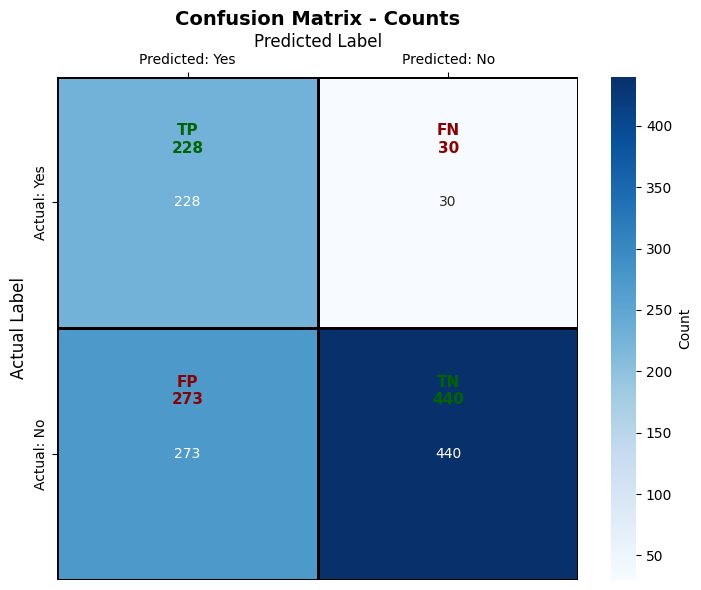

In [465]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Ekstrak nilai
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# FLIP confusion matrix agar TP di kiri atas
# Format baru: [[TP, FN], [FP, TN]]
cm_flipped = np.array([[tp, fn], [fp, tn]])

plt.figure(figsize=(14, 6))

# Subplot 1: Heatmap dengan angka (FLIPPED)
ax = plt.subplot(1, 2, 1)
sns.heatmap(cm_flipped, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Yes', 'Predicted: No'],
            yticklabels=['Actual: Yes', 'Actual: No'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black')
plt.title('Confusion Matrix - Counts', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Pindahkan x-axis label ke atas
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Tambahkan label dengan posisi yang sudah diflip
plt.text(0.5, 0.25, f'TP\n{tp}', ha='center', va='center', 
         fontsize=11, color='darkgreen', fontweight='bold')
plt.text(1.5, 0.25, f'FN\n{fn}', ha='center', va='center', 
         fontsize=11, color='darkred', fontweight='bold')
plt.text(0.5, 1.25, f'FP\n{fp}', ha='center', va='center', 
         fontsize=11, color='darkred', fontweight='bold')
plt.text(1.5, 1.25, f'TN\n{tn}', ha='center', va='center', 
         fontsize=11, color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

### Analisis Confusion Matrix

Berdasarkan data uji, model berhasil mengidentifikasi ```228 pelanggan churn dengan benar (True Positive)``` dan hanya ``30 pelanggan churn yang terlewat (False Negative)``, yang menunjukkan kemampuan model yang sangat baik dalam mendeteksi pelanggan berisiko tinggi. Namun, terdapat 273 False Positive, yaitu pelanggan yang sebenarnya tidak churn tetapi diprediksi churn, yang berimplikasi pada pemberian insentif retensi kepada sebagian pelanggan yang sebenarnya loyal. Meskipun demikian, dari perspektif bisnis, **risiko False Positive masih lebih dapat ditoleransi dibandingkan kehilangan pelanggan akibat False Negative, mengingat dampak finansial churn jauh lebih besar**.

In [466]:

# --- Predict menggunakan best model ---
y_test_pred = best_pipeline.predict(X_test)

# --- Hitung metrik evaluasi ---
final_accuracy = accuracy_score(y_test, y_test_pred) * 100
final_precision = precision_score(
    y_test, y_test_pred, pos_label='Yes', zero_division=0
) * 100
final_recall = recall_score(
    y_test, y_test_pred, pos_label='Yes', zero_division=0
) * 100
final_f1 = f1_score(
    y_test, y_test_pred, pos_label='Yes', zero_division=0
) * 100

# --- Tampilkan dalam DataFrame ---
final_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score (%)': [
        round(final_accuracy, 2),
        round(final_precision, 2),
        round(final_recall, 2),
        round(final_f1, 2)
    ]
})

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE (TEST SET)")
print("="*60)
print(final_metrics)



FINAL MODEL PERFORMANCE (TEST SET)
      Metric  Score (%)
0   Accuracy      68.80
1  Precision      45.51
2     Recall      88.37
3   F1-Score      60.08




### 1. Recall (88,37%) ⭐
Recall yang tinggi menandakan bahwa **88,37%** pelanggan yang benar-benar churn berhasil terdeteksi oleh model, sehingga hanya sebagian kecil pelanggan churn yang terlewat.

**Implikasi Bisnis:** Ini merupakan hasil yang sangat kuat secara bisnis, karena perusahaan dapat melakukan tindakan preventif lebih awal dan secara signifikan menekan potensi kehilangan pelanggan dan pendapatan.

---

### 2. Accuracy (68,80%)
Akurasi menunjukkan bahwa sekitar **68,8%** prediksi model benar secara keseluruhan, namun pada kasus churn yang memiliki ketidakseimbangan kelas, akurasi bukan metrik utama karena dapat menyesatkan dan tidak merepresentasikan kemampuan model dalam mendeteksi pelanggan churn.

**Implikasi Bisnis:** Akurasi yang sedang ini dapat diterima karena fokus utama perusahaan adalah mengurangi kehilangan pelanggan, bukan sekadar memaksimalkan prediksi benar secara umum.

---

### 3. Precision (45,51%)
Precision yang relatif rendah menunjukkan bahwa dari seluruh pelanggan yang diprediksi churn, sekitar **45,5%** benar-benar churn, sementara sisanya adalah pelanggan loyal yang menerima perlakuan retensi.

**Implikasi Bisnis:** Hal ini berdampak pada inefisiensi biaya promosi, namun masih dapat diterima karena biaya retensi lebih kecil dibandingkan kerugian akibat kehilangan pelanggan churn yang tidak terdeteksi.

---

### 4. F1-Score (60,08%)
F1-score menunjukkan keseimbangan antara precision dan recall, dengan nilai yang moderat akibat adanya trade-off antara recall yang tinggi dan precision yang lebih rendah.

**Implikasi Bisnis:** Nilai ini mencerminkan bahwa model lebih agresif dalam menangkap churn, sesuai dengan strategi bisnis yang memprioritaskan pencegahan kehilangan pelanggan dibandingkan efisiensi biaya promosi semata.

---

### Kesimpulan Metrik
Model ini dioptimalkan untuk **memaksimalkan Recall** sebagai prioritas utama, dengan kesadaran bahwa Precision yang lebih rendah merupakan trade-off yang dapat diterima dalam konteks bisnis telekomunikasi di mana kehilangan pelanggan memiliki dampak finansial yang jauh lebih besar dibandingkan biaya program retensi.

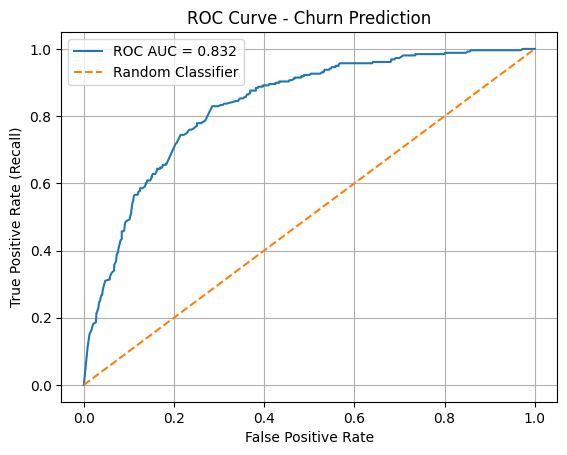

In [467]:


# --- Prediksi probabilitas kelas positif (Yes) ---
y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]

# --- Hitung ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# --- Plot ROC Curve ---
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Churn Prediction')
plt.legend()
plt.grid(True)
plt.show()


## Analisis Kurva ROC

### 📊 Interpretasi Kurva ROC

Kurva ROC tersebut menunjukkan bahwa model memiliki **kemampuan yang kuat** dalam membedakan pelanggan yang akan churn dan yang tidak, dengan karakteristik sebagai berikut:

---

### 🎯 AUC Score: 0,832

Nilai **AUC (Area Under the Curve) sebesar 0,832** menandakan bahwa:

- Terdapat probabilitas **83,2%** bahwa model akan memberikan skor lebih tinggi pada pelanggan yang benar-benar churn dibandingkan pelanggan non-churn
- Model memiliki kemampuan diskriminasi yang **sangat baik** (AUC > 0,8)
- Performa model jauh lebih baik dibandingkan random classifier (AUC = 0,5)

---

### 📈 Karakteristik Kurva

**Posisi Kurva:**
- Kurva berada **jauh di atas garis diagonal** (random classifier)
- Menunjukkan superioritas model dalam membedakan kelas churn dan non-churn

**Trade-off yang Optimal:**
- Pada berbagai threshold, model mampu mencapai **True Positive Rate (Recall)** yang tinggi
- **False Positive Rate** tetap terkendali dan tidak meningkat secara drastis
- Menunjukkan keseimbangan yang baik antara sensitivitas dan spesifisitas

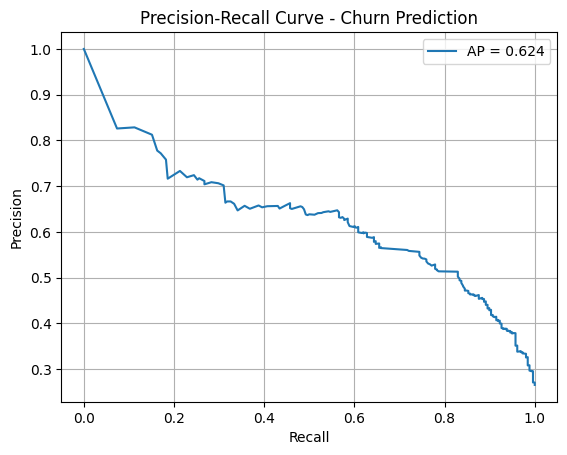

In [468]:

# --- Hitung Precision-Recall ---
precision, recall, thresholds_pr = precision_recall_curve(
    y_test, y_test_proba, pos_label='Yes'
)

avg_precision = average_precision_score(
    y_test, y_test_proba, pos_label='Yes'
)

# --- Plot PR Curve ---
plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Churn Prediction')
plt.legend()
plt.grid(True)
plt.show()


### 📊 Interpretasi Kurva Precision–Recall

Kurva Precision–Recall menunjukkan bagaimana **kinerja model dalam mendeteksi pelanggan churn (kelas minoritas)** dengan fokus pada keseimbangan antara **ketepatan prediksi (precision)** dan **kemampuan menangkap churn (recall)**, yang sangat relevan untuk kasus klasifikasi churn dengan data tidak seimbang.

---

### 🎯 Average Precision (AP): 0,624

Nilai **Average Precision (AP) sebesar 0,624** menandakan bahwa:

* Secara rata-rata, model mampu mempertahankan **precision yang cukup baik di berbagai tingkat recall**
* Performa model **jauh lebih baik dibandingkan baseline acak**, terutama dalam mendeteksi kelas churn
* Nilai AP ini menunjukkan bahwa model memiliki **kemampuan yang layak dan konsisten** dalam mengidentifikasi pelanggan berisiko churn pada data dengan distribusi kelas tidak seimbang

---

### 📈 Karakteristik Kurva

**Pola Kurva:**

* Precision relatif **tinggi pada recall rendah hingga menengah**, lalu menurun seiring peningkatan recall
* Pola ini mencerminkan **trade-off alami** antara menangkap lebih banyak pelanggan churn dan meningkatnya false positive

# Feature Importence

In [469]:
# Ambil preprocessor dari best pipeline
preprocessor = best_pipeline.named_steps['preprocessor']

# Ambil feature names hasil transformasi
feature_names = preprocessor.get_feature_names_out()

# Ambil model Logistic Regression dari pipeline
logreg_model = best_pipeline.named_steps['model']

# Koefisien (binary classification → flatten)
coefficients = logreg_model.coef_.flatten()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
})

# Urutkan berdasarkan pengaruh terbesar
feature_importance = feature_importance.sort_values(
    by='abs_coefficient',
    ascending=False
)

feature_importance['odds_ratio'] = np.exp(feature_importance['coefficient'])

feature_importance.head(12)

,feature,coefficient,abs_coefficient,odds_ratio
11,ordinal__Contract,-1.228971,1.228971,0.292594
6,onehot__InternetService_Fiber optic,0.823025,0.823025,2.277379
0,num__tenure,-0.551992,0.551992,0.575802
10,onehot__PaperlessBilling_Yes,0.165858,0.165858,1.180405
3,onehot__Dependents_Yes,0.000000,0.000000,1.000000
2,num__TotalServices,0.000000,0.000000,1.000000
1,num__MonthlyCharges,0.000000,0.000000,1.000000
4,onehot__OnlineSecurity_Yes,0.000000,0.000000,1.000000
7,onehot__InternetService_No,0.000000,0.000000,1.000000
5,onehot__OnlineBackup_Yes,0.000000,0.000000,1.000000


## 📊 Insight Feature Importance (Logistic Regression – L1)

Hasil feature importance menunjukkan bahwa **hanya beberapa fitur utama yang benar-benar berkontribusi signifikan terhadap prediksi churn**, sementara fitur lainnya dieliminasi oleh regularisasi L1 (koefisien = 0), yang menandakan bahwa fitur-fitur tersebut **kurang relevan secara statistik dalam konteks model ini**.

---

### 🔑 Fitur Paling Berpengaruh terhadap Churn

#### 1. **Contract (Ordinal)**

* **Koefisien:** −1,229
* **Odds Ratio:** 0,29

**Insight:**
Jenis kontrak merupakan **faktor paling dominan** dalam menurunkan risiko churn; semakin panjang durasi kontrak (misalnya one year atau two year), peluang pelanggan untuk churn **turun hingga sekitar 71%** dibandingkan pelanggan dengan kontrak bulanan, sehingga kontrak jangka panjang menjadi strategi retensi yang sangat efektif.

---

#### 2. **InternetService – Fiber Optic**

* **Koefisien:** +0,823
* **Odds Ratio:** 2,28

**Insight:**
Pelanggan yang menggunakan layanan **Fiber Optic** memiliki **risiko churn lebih dari 2 kali lipat** dibandingkan pelanggan dengan layanan internet lain, yang mengindikasikan potensi ketidaksesuaian antara **harga tinggi dan ekspektasi kualitas layanan**.

---

#### 3. **Tenure**

* **Koefisien:** −0,552
* **Odds Ratio:** 0,58

**Insight:**
Semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn; setiap peningkatan tenure secara signifikan **menurunkan risiko churn**, menegaskan pentingnya fase awal pelanggan sebagai periode kritis untuk retensi.

---

#### 4. **PaperlessBilling – Yes**

* **Koefisien:** +0,166
* **Odds Ratio:** 1,18

**Insight:**
Pelanggan yang menggunakan **paperless billing** memiliki kecenderungan churn yang sedikit lebih tinggi, yang kemungkinan berkaitan dengan **profil pelanggan digital** yang lebih sensitif terhadap harga dan kualitas layanan.

---

### ⚪ Fitur dengan Koefisien Nol (Tidak Signifikan)

Fitur-fitur berikut memiliki **koefisien nol** akibat regularisasi L1, yang berarti **tidak memberikan kontribusi signifikan terhadap prediksi churn** dalam model ini:

* Dependents
* TotalServices
* MonthlyCharges
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* InternetService – No

**Insight:**
Meskipun fitur-fitur tersebut secara intuitif relevan secara bisnis, dalam konteks model ini dan setelah mempertimbangkan fitur lain, **pengaruhnya tidak cukup kuat atau redundan**, sehingga dieliminasi untuk menjaga kesederhanaan dan generalisasi model.

# Conclusion



Proyek ini bertujuan untuk membangun model Machine Learning yang mampu memprediksi **Customer Churn** di perusahaan telekomunikasi dengan fokus utama pada **Recall**, yaitu meminimalkan jumlah pelanggan churn yang gagal terdeteksi (False Negative).

Berikut adalah poin-poin kunci dari hasil pemodelan:

---

## 🏆 Model Terbaik

Algoritma terpilih adalah **Logistic Regression** dengan teknik resampling **SMOTE** dan regularisasi **L1 (Lasso)**. Model ini dipilih karena kemampuannya yang stabil, interpretabilitas yang tinggi, dan performa generalisasi yang baik.

---

## 📊 Performa Model

| Metrik | Nilai | Interpretasi |
|--------|-------|--------------|
| **Recall** | **88.37%** | Model berhasil mendeteksi sekitar 88% dari total pelanggan yang benar-benar akan churn. Ini memenuhi Analytical Goal utama. |
| **ROC-AUC** | **0.832** | Model memiliki kemampuan diskriminasi yang sangat baik dalam membedakan antara pelanggan churn dan non-churn. |
| **Precision** | **45.51%** | Meskipun ada trade-off berupa Precision yang relatif rendah (banyak False Positive), hal ini sudah diantisipasi dan diterima dalam strategi bisnis karena biaya retensi jauh lebih murah dibandingkan biaya akuisisi pelanggan baru. |

---

## 🔍 Faktor Utama Pemicu Churn (Feature Importance)

Berkat penggunaan regularisasi L1, model berhasil menyaring fitur yang tidak relevan (koefisien 0) dan menyoroti **4 faktor paling krusial**:

### 1. **Contract (Month-to-month)**
Pelanggan dengan kontrak bulanan memiliki risiko churn tertinggi. Kontrak jangka panjang (1-2 tahun) secara drastis menurunkan risiko ini.

### 2. **Internet Service (Fiber Optic)**
Pengguna layanan Fiber Optic memiliki kecenderungan churn yang tinggi (koefisien positif yang besar), mengindikasikan potensi masalah pada kualitas layanan atau harga yang dianggap tidak sepadan (overpriced).

### 3. **Tenure (Lama Berlangganan)**
Semakin lama pelanggan bergabung, semakin rendah risiko churn. Risiko terbesar ada pada pelanggan baru.

### 4. **Paperless Billing**
Pelanggan dengan tagihan digital memiliki kecenderungan churn yang sedikit lebih tinggi, mungkin karena kemudahan akses informasi untuk membandingkan harga dengan kompetitor.

---

# Impact to Business

Penerapan model ini memberikan dampak signifikan terhadap efisiensi operasional dan stabilitas pendapatan perusahaan, menjawab masalah tingginya biaya akuisisi (Customer Acquisition Cost).

---

## 📉 Pengurangan Risiko Kehilangan Pendapatan (Revenue Protection)

Dengan **Recall sebesar 88.37%**, perusahaan dapat "menyelamatkan" mayoritas pelanggan berisiko tinggi sebelum mereka benar-benar pergi. Jika diasumsikan kehilangan satu pelanggan bernilai tinggi berdampak besar pada Customer Lifetime Value (CLV), kemampuan model mendeteksi 9 dari 10 calon churner adalah aset krusial untuk menjaga recurring revenue.

---

## 💰 Efisiensi Biaya Retensi (Cost Optimization)

Sebelumnya, insentif diberikan secara merata (tidak efektif). Dengan model ini:

- Meskipun Precision 45%, menargetkan promosi kepada pelanggan yang diprediksi churn jauh lebih hemat daripada memberikan diskon ke seluruh basis pelanggan.

- Biaya yang dikeluarkan untuk insentif retensi pada False Positive (pelanggan setia yang diprediksi churn) dianggap sebagai investasi untuk meningkatkan loyalitas, yang biayanya jauh lebih rendah (1/5) dibandingkan biaya mengakuisisi pelanggan pengganti jika terjadi False Negative.

---

## 🎯 Strategi Pemasaran yang Terarah

Tim bisnis tidak lagi menebak-nebak. Model memberikan daftar prioritas pelanggan yang perlu dihubungi, memungkinkan tim Customer Success atau Marketing untuk fokus pada segmen yang benar-benar membutuhkan intervensi, meningkatkan ROI (Return on Investment) dari kampanye retensi.

---


# Recommendation

Berdasarkan insight dari Feature Importance dan performa model, berikut adalah rekomendasi strategis untuk tim bisnis:

---

## A. Strategi Berbasis Kontrak (Action on Contract)

### 📋 Insentif Migrasi Kontrak
Buat kampanye agresif untuk memindahkan pelanggan Month-to-month ke kontrak 1 atau 2 tahun. Tawarkan:
- Diskon biaya bulanan
- Upgrade kecepatan internet gratis untuk 3 bulan pertama jika mereka berkomitmen pada kontrak jangka panjang

### 🚧 Barrier to Exit
Evaluasi kembali struktur kontrak bulanan agar pelanggan merasa lebih diuntungkan jika mengambil paket jangka panjang.

---

## B. Audit Layanan Fiber Optic (Action on Fiber Optic)

### 🔧 Investigasi Kualitas
Karena pengguna Fiber Optic berisiko tinggi churn, tim teknis harus segera melakukan audit kualitas jaringan:
- Apakah sering terjadi downtime?
- Apakah kecepatan sesuai yang dijanjikan?

### 💵 Evaluasi Harga
Lakukan riset kompetitor. Jika kualitas teknis baik, kemungkinan harga Fiber Optic perusahaan terlalu tinggi dibanding kompetitor. Pertimbangkan:
- Bundling layanan (misal: tambah Streaming Service)
- Meningkatkan value proposition tanpa menurunkan harga secara langsung

---

## C. Program Onboarding Pelanggan Baru (Action on Tenure)

### 📅 Fokus 90 Hari Pertama
Karena tenure rendah berisiko tinggi, buat program special onboarding untuk pelanggan baru. Pastikan pengalaman mereka sempurna di 3 bulan pertama.

### 📞 Engagement Dini
Lakukan panggilan cek kepuasan (courtesy call) pada:
- Minggu pertama pemakaian
- Bulan pertama pemakaian

Tujuannya untuk menyelesaikan masalah teknis sebelum pelanggan merasa frustrasi.

---

## D. Pemanfaatan Output Model

### 🎚️ Tiered Retention
Gunakan probabilitas prediksi (bukan hanya label Yes/No):

| Probabilitas | Kategori Risiko | Tindakan |
|--------------|-----------------|----------|
| **> 80%** | **High Risk** | Tawarkan diskon besar atau kunjungan teknisi prioritas |
| **50-80%** | **Medium Risk** | Tawarkan bonus layanan atau poin loyalitas |

---

## 📌 Kesimpulan Akhir

Model prediksi churn ini bukan hanya alat teknis, tetapi **strategic asset** yang memungkinkan perusahaan untuk:
1. ✅ Mengidentifikasi pelanggan berisiko tinggi dengan akurasi 88.37%
2. ✅ Mengoptimalkan alokasi budget retensi
3. ✅ Meningkatkan customer lifetime value melalui intervensi yang tepat waktu
4. ✅ Membangun strategi bisnis berbasis data yang terukur dan berkelanjutan

In [471]:
import pickle

# Simpan model
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

print("Model berhasil disimpan ke churn_model.pkl")


Model berhasil disimpan ke churn_model.pkl
